In [1]:
from utils import *
import os.path as path

In [2]:
img_root = '/home/mpyg/Documents/Codes/MIP_SAM/test_img'
dirs = list_dirs(img_root)
print(dirs)

['/home/mpyg/Documents/Codes/MIP_SAM/test_img', '/home/mpyg/Documents/Codes/MIP_SAM/test_img/samed', '/home/mpyg/Documents/Codes/MIP_SAM/test_img/split', '/home/mpyg/Documents/Codes/MIP_SAM/test_img/sub_1', '/home/mpyg/Documents/Codes/MIP_SAM/test_img/sub_1/sub_2']


In [3]:
save_root = '/home/mpyg/Documents/Codes/MIP_SAM/test_img/split'
for dir in dirs:
    images, names = read_imgs(dir, (2048, 2048, 3))
    for i in range(len(images)):
        imgs = slide_win_cut_imgs(images[i], (224, 224), (9, 9))
        save_imgs(imgs, save_root, names[i])

In [4]:
from backend.pipline import Pipeline

file_path = os.getcwd()
project_path = path.dirname(file_path)
print(project_path)
pipeline = Pipeline(path.join(project_path, "model/sam_vit_h_4b8939.pth"), "vit_h")

/home/mpyg/Documents/Codes/MIP_SAM


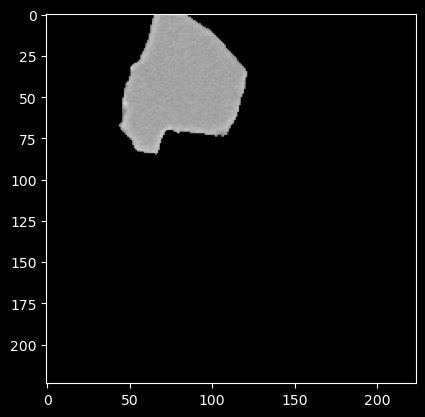

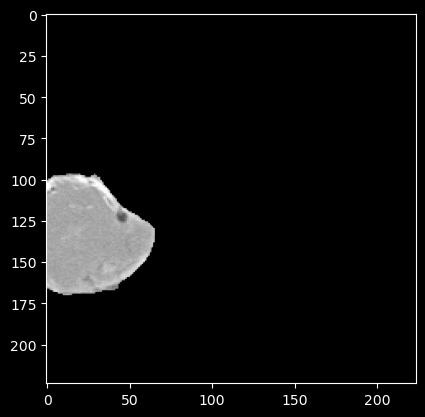

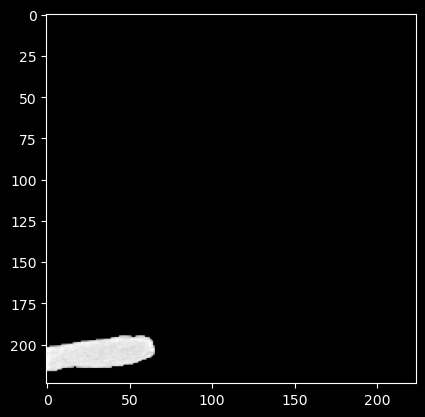

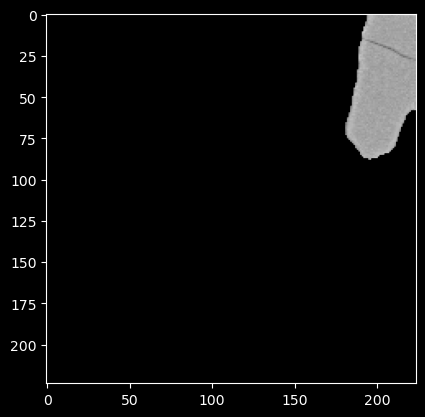

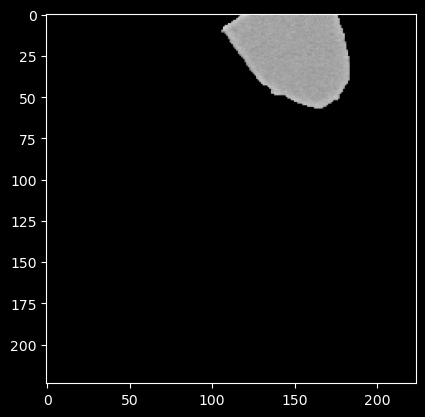

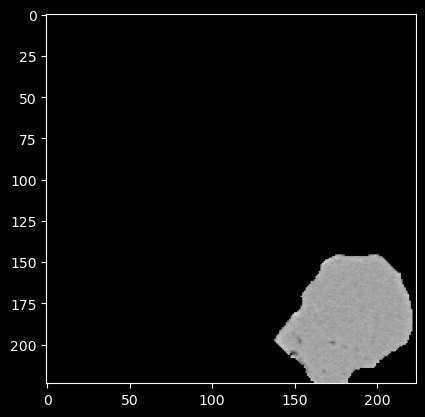

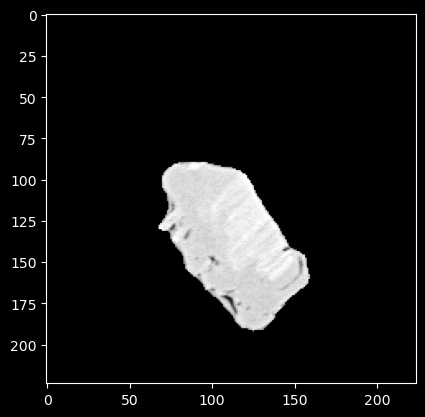

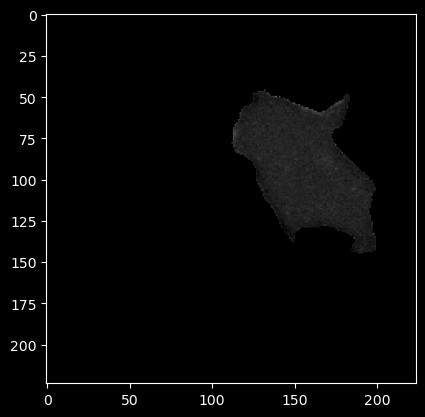

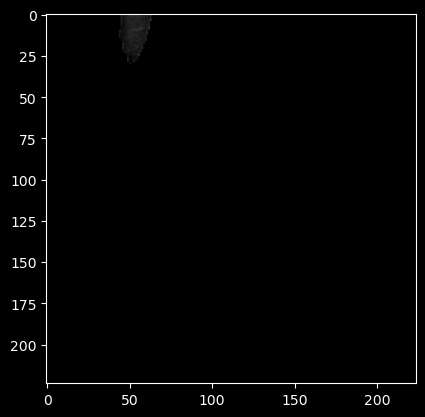

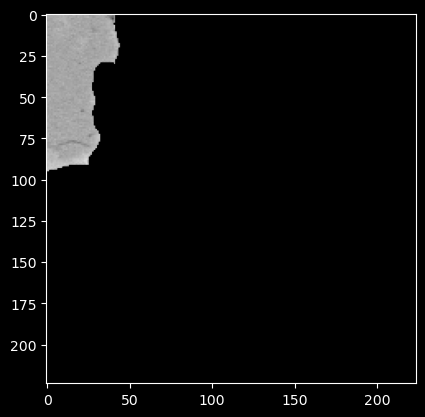

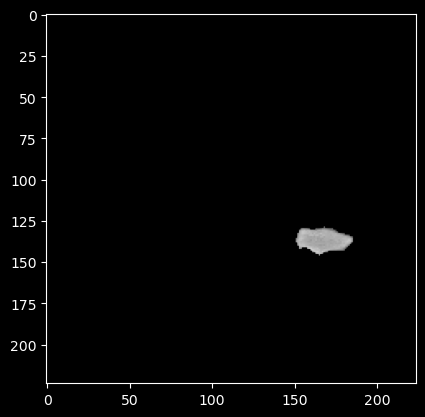

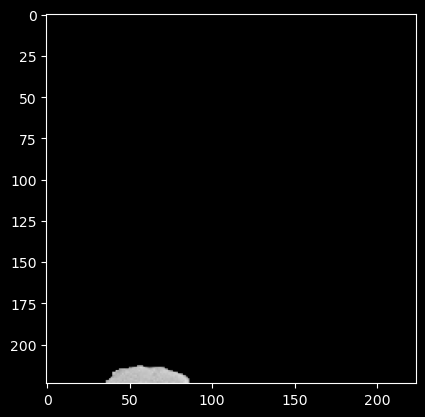

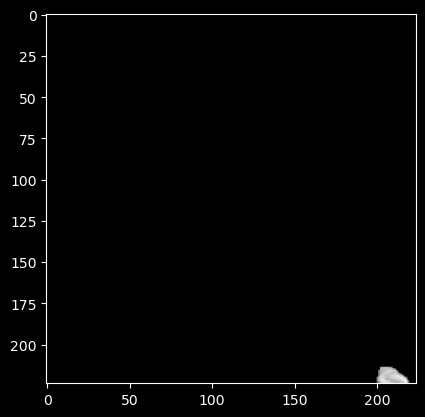

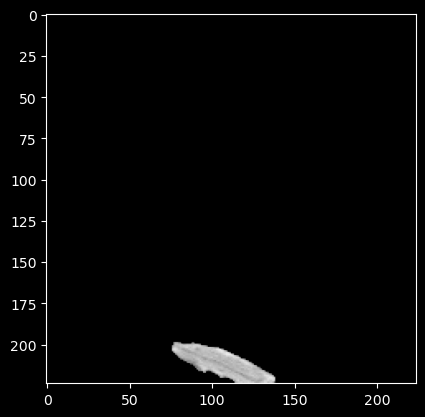

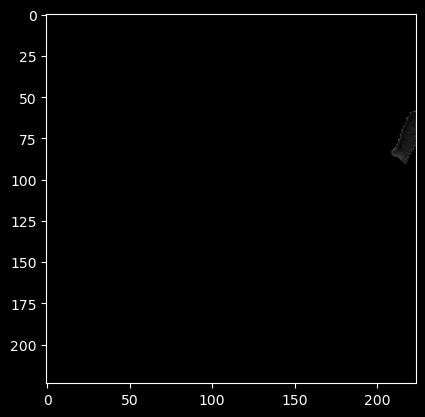

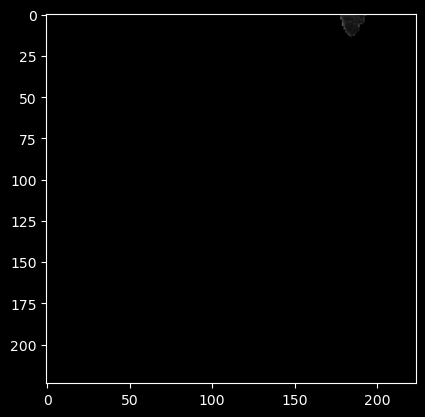

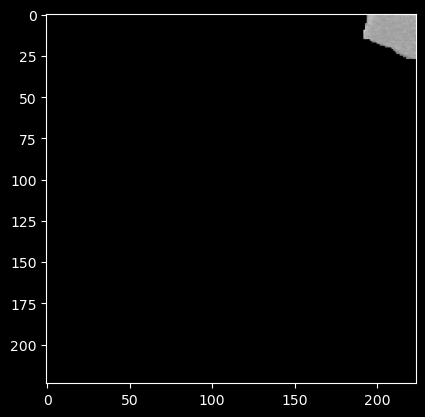

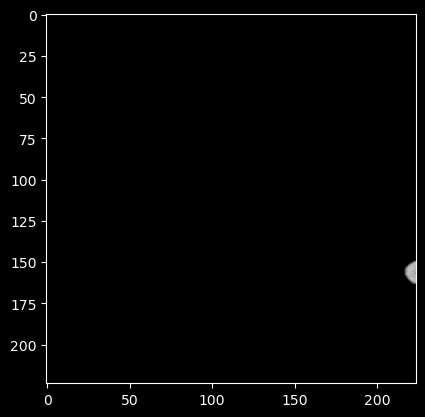

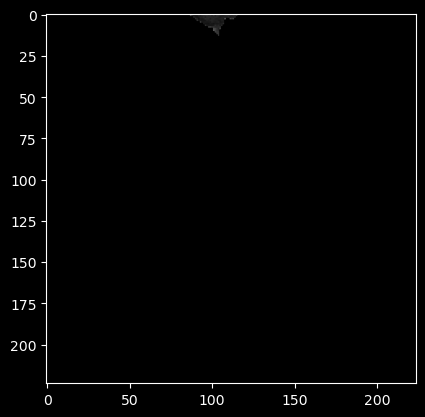

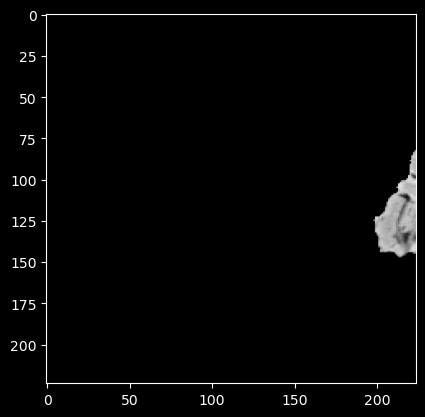

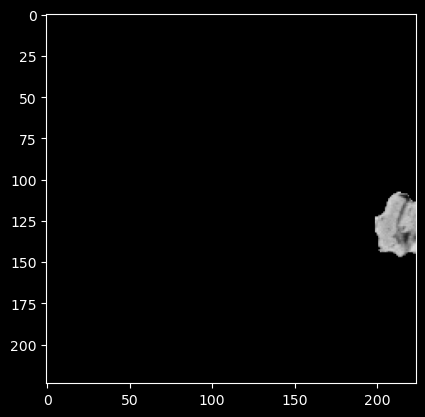

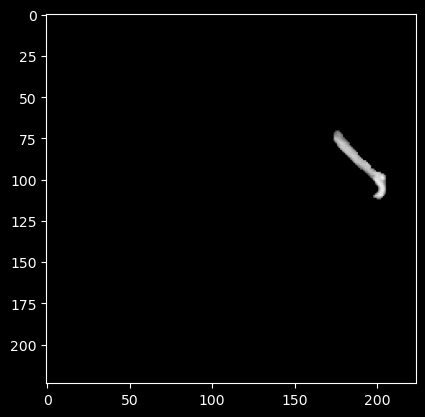

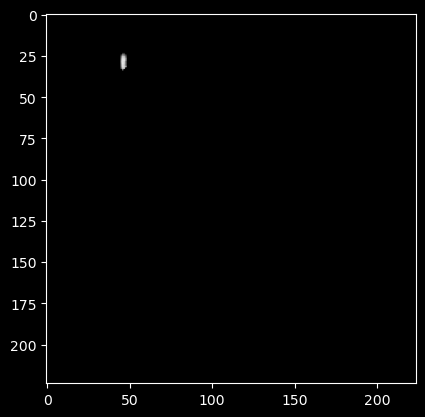

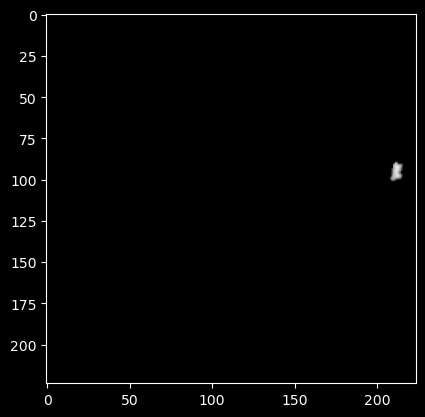

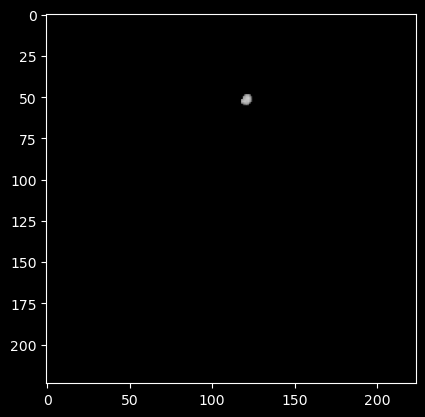

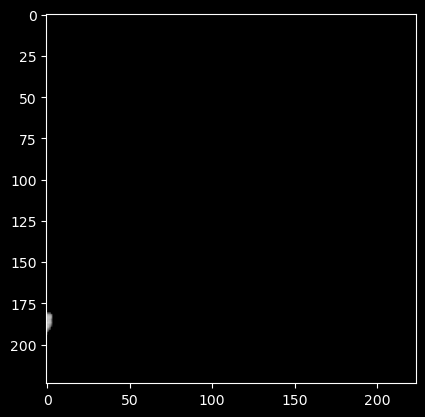

In [6]:
import matplotlib.pyplot as plt

sam_root = '/home/mpyg/Documents/Codes/MIP_SAM/test_img/samed'
images, names = read_imgs(save_root, (224, 224, 3))
for i in range(len(images)):
    masks = pipeline.make_masks(images[i])
    res = []
    for mask in masks:
        cov_img = np.zeros(images[i].shape, dtype=int)
        cov_img[np.where(mask['segmentation'])] = images[i][np.where(mask['segmentation'])]
        b_channel, g_channel, r_channel = cv2.split(cov_img)
        alpha_channel = np.zeros(b_channel.shape, dtype=b_channel.dtype)
        alpha_channel[np.where(mask['segmentation'])] = 255
        img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))
        res.append(img_BGRA)
    for result in res:
        plt.imshow(result)
        plt.show()
    break
    save_imgs(np.asarray(res), sam_root, names[i])
